In [788]:
#Create Model - E.g. Sequential
#Add Layer(s) to model - E.g. Dense
#Compile Model
#fit the model

In [789]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [790]:
model = Sequential()

In [791]:
model.add(Dense(1,input_shape=(3,)))

In [792]:
model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(Adam(lr=0.8),'mean_squared_error')

In [793]:
df = pd.read_csv('data/housing-data.csv')

In [794]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [795]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [796]:
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

In [797]:
# Display Histogram

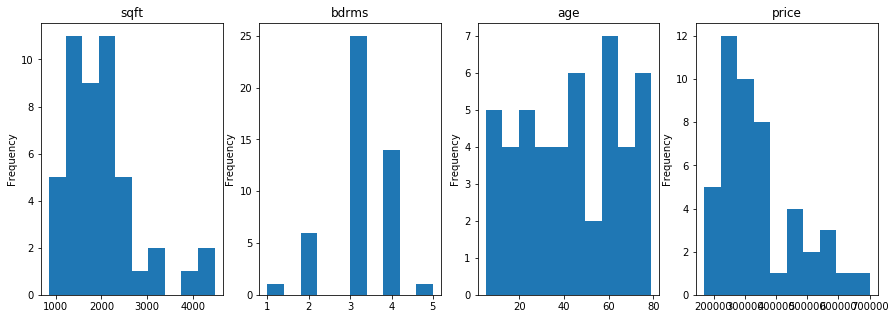

In [798]:
plt.figure(figsize=(15,5))
for i,feature in enumerate(df.columns):
    #print(i)
    #print(feature)
    plt.subplot(1,4,i+1)
    df[feature].plot(kind='hist', title=feature)

In [799]:
X = df.iloc[:,0:3]

In [800]:
X.describe()

,sqft,bdrms,age
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681
std,794.702354,0.760982,22.873440
min,852.000000,1.000000,5.000000
25%,1432.000000,3.000000,24.500000
50%,1888.000000,3.000000,44.000000
75%,2269.000000,4.000000,61.500000
max,4478.000000,5.000000,79.000000


In [801]:
y = df.iloc[:,3:4]

In [802]:
y #Make sure that price is appearing as label.

,price
0,399900
1,329900
2,369000
3,232000
4,539900
5,299900
6,314900
7,198999
8,212000
9,242500


In [803]:
y.describe()

,price
count,47.000000
mean,340412.659574
std,125039.899586
min,169900.000000
25%,249900.000000
50%,299900.000000
75%,384450.000000
max,699900.000000


In [804]:
from sklearn.preprocessing import MinMaxScaler

In [805]:
scaler = MinMaxScaler()

In [806]:
X[['sqft','age']] = scaler.fit_transform(X[['sqft','age']])

/home/dimple/anaconda3/envs/keras/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dimple/anaconda3/envs/keras/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [807]:
X = X.values

In [808]:
y[['price']] = scaler.fit_transform(y[['price']])

/home/dimple/anaconda3/envs/keras/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dimple/anaconda3/envs/keras/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [809]:
y = y.values

In [810]:
from sklearn.model_selection import train_test_split

In [811]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [812]:
len(X_train)
#len(X_test)

37

In [813]:
model.fit(X_train,y_train, epochs=40)

Epoch 1/40
37/37 [==============================] - 0s 8ms/step - loss: 0.2361
Epoch 2/40
37/37 [==============================] - 0s 94us/step - loss: 0.2280
Epoch 3/40
37/37 [==============================] - 0s 115us/step - loss: 0.2203
Epoch 4/40
37/37 [==============================] - 0s 78us/step - loss: 0.2129
Epoch 5/40
37/37 [==============================] - 0s 55us/step - loss: 0.2052
Epoch 6/40
37/37 [==============================] - 0s 51us/step - loss: 0.1980
Epoch 7/40
37/37 [==============================] - 0s 58us/step - loss: 0.1909
Epoch 8/40
37/37 [==============================] - 0s 54us/step - loss: 0.1843
Epoch 9/40
37/37 [==============================] - 0s 56us/step - loss: 0.1775
Epoch 10/40
37/37 [==============================] - 0s 187us/step - loss: 0.1712
Epoch 11/40
37/37 [==============================] - 0s 60us/step - loss: 0.1650
Epoch 12/40
37/37 [==============================] - 0s 61us/step - loss: 0.1591
Epoch 13/40
37/37 [=================

In [814]:
model.predict(X_test)

array([[-0.06004839],
       [ 0.00505758],
       [ 0.17766237],
       [ 0.22630483],
       [ 0.43243042],
       [ 0.3787012 ],
       [ 0.06077141],
       [ 0.21699089],
       [ 0.15486497],
       [ 0.3431092 ]], dtype=float32)

In [815]:
y_test

array([[0.11716981],
       [0.27358491],
       [0.30207358],
       [0.11320755],
       [0.21886792],
       [0.33415094],
       [0.24528302],
       [0.55584906],
       [0.15660377],
       [0.2209434 ]])